In [42]:
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv('./Statics/Datas/email.csv')

In [44]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [45]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [46]:
df=df.iloc[:-1,:]

In [47]:
df.tail()


,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [48]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [49]:
df.duplicated().sum()

415

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.duplicated().sum()

0

In [52]:
df.count()

Category    5157
Message     5157
dtype: int64

In [53]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [54]:
df.shape

(5157, 2)

In [55]:
df.head(1)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."


In [56]:
# df['Category'].replace({'spam': 1, 'ham': 0}, inplace=True)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [57]:
df['Category']=encoder.fit_transform(df['Category'])

In [58]:
df['Category'].sum()

641

In [59]:
df.shape

(5157, 2)

# Visulization

In [60]:
import matplotlib.pyplot as plt

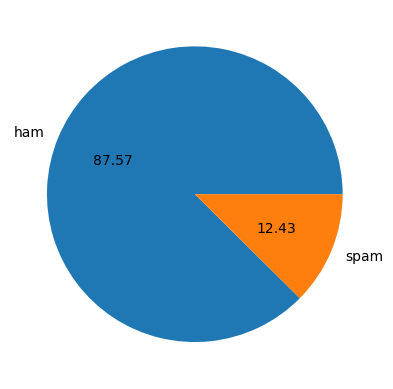

In [61]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [62]:
import nltk

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/veer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
df['num_crector']=df['Message'].apply(len)

In [65]:
df.head()

,Category,Message,num_crector
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Number of words


In [66]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df.head()

,Category,Message,num_crector,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [68]:
df['num_sen']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,Category,Message,num_crector,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
df.describe()

,Category,num_crector,num_words,num_sen
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [71]:
df[df['Category']==0][['num_crector','num_words','num_sen']].describe()

,num_crector,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
df[df['Category']==1][['num_crector','num_words','num_sen']].describe()

,num_crector,num_words,num_sen
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [73]:
import seaborn as snb

<Axes: xlabel='num_crector', ylabel='Count'>

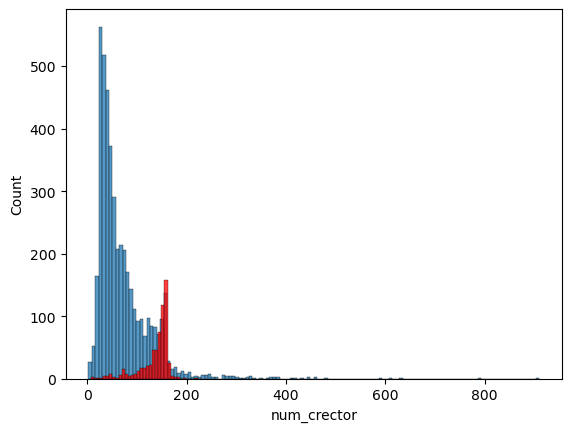

In [74]:
snb.histplot(df[df['Category']==0]['num_crector'])
snb.histplot(df[df['Category']==1]['num_crector'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

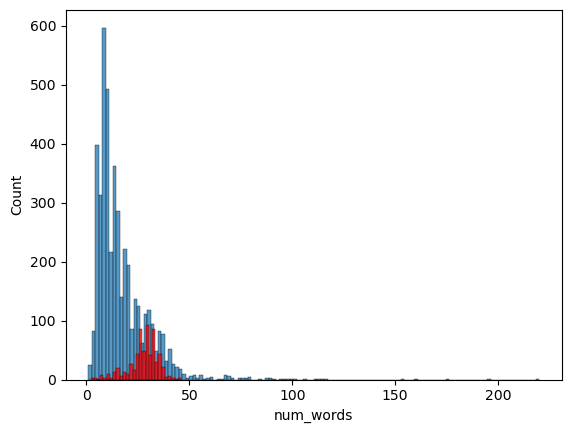

In [75]:
snb.histplot(df[df['Category']==0]['num_words'])
snb.histplot(df[df['Category']==1]['num_words'],color='red')

/home/veer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


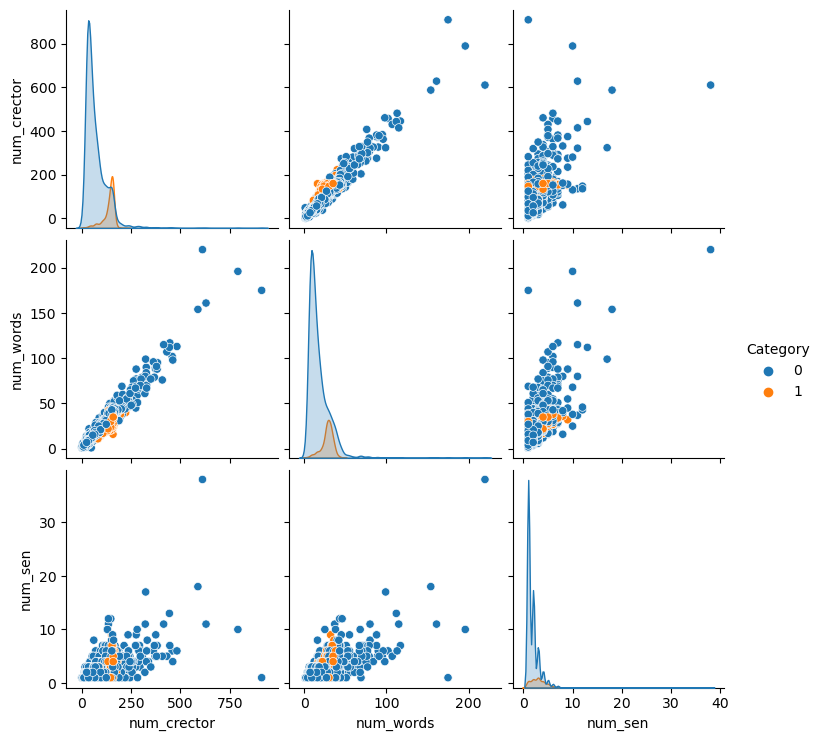

In [76]:
snb.pairplot(df,hue='Category')

In [77]:
df.head(5)

,Category,Message,num_crector,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [78]:
# df.corr

In [79]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/veer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append((ps.stem(i)))

    return " ".join(y)

In [83]:
transform_text("har kise ko nhi milta yaha payar jindgi main loved the songs ")

'har kise ko nhi milta yaha payar jindgi main love song'

In [84]:
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [85]:
df['Message'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

In [86]:
transform_text(df['Message'][5])

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [87]:
df['t_text']=df['Message'].apply(transform_text)

In [88]:
df.head(10)

,Category,Message,num_crector,num_words,num_sen,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [89]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [90]:
spam_wc=wc.generate(df[df['Category']==1]['t_text'].str.cat(sep=" "))

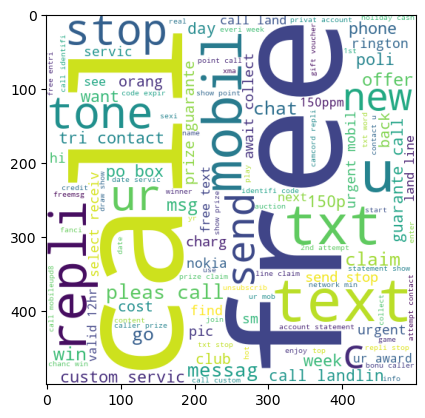

In [91]:
plt.imshow(spam_wc)

In [92]:
ham_wc=wc.generate(df[df['Category']==0]['t_text'].str.cat(sep=" "))

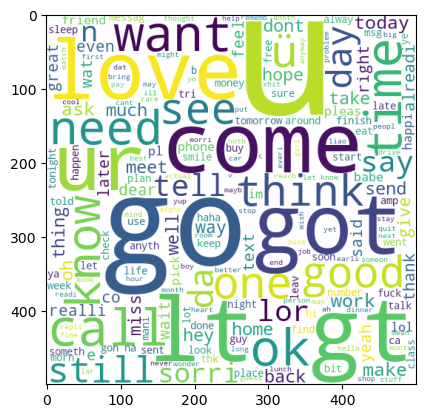

In [93]:
plt.imshow(ham_wc)

In [94]:
df.head(10)

,Category,Message,num_crector,num_words,num_sen,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [95]:
spam=[]
for email in df[df['Category']==1]['t_text'].tolist():
    for word in email.split():
        spam.append(word)

In [96]:
len(spam)

9781

In [97]:
# from collections import Counter
# snb.barplot(pd.DataFrame(Counter(spam).most_common(30))[0])


# Model Bulding

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)
# cv=CountVectorizer()


In [99]:
x=cv.fit_transform(df['t_text']).toarray()

In [100]:
x.shape

(5157, 3000)

In [101]:
y=df['Category']

In [102]:
y.shape

(5157,)

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [104]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [105]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [106]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8550387596899225
[[977 151]
 [ 36 126]]
0.4548736462093863


In [107]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9689922480620154
[[1128    0]
 [  40  122]]
1.0


In [108]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9767441860465116
[[1125    3]
 [  27  135]]
0.9782608695652174


In [109]:
# tfidf
# mnb

# Check all ml algorithms

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [111]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [112]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [113]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [114]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9689922480620154, 0.9552238805970149)

In [115]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9689922480620154
Precision -  0.9552238805970149
For  KN
Accuracy -  0.9116279069767442
Precision -  1.0
For  NB
Accuracy -  0.9689922480620154
Precision -  1.0
For  DT
Accuracy -  0.9302325581395349
Precision -  0.8050847457627118
For  LR
Accuracy -  0.9418604651162791
Precision -  0.8918918918918919
For  RF
Accuracy -  0.9736434108527132
Precision -  0.9848484848484849
For  AdaBoost
Accuracy -  0.9651162790697675
Precision -  0.927007299270073
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.868421052631579
For  ETC
Accuracy -  0.9775193798449613
Precision -  0.9784172661870504
For  GBDT
Accuracy -  0.9496124031007752
Precision -  0.9532710280373832
For  xgb
Accuracy -  0.9674418604651163
Precision -  0.9411764705882353


In [116]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [117]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911628,1.000000
2,NB,0.968992,1.000000
5,RF,0.973643,0.984848
8,ETC,0.977519,0.978417
0,SVC,0.968992,0.955224
9,GBDT,0.949612,0.953271
10,xgb,0.967442,0.941176
6,AdaBoost,0.965116,0.927007
4,LR,0.941860,0.891892
7,BgC,0.961240,0.868421


In [118]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [119]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911628
1,NB,Accuracy,0.968992
2,RF,Accuracy,0.973643
3,ETC,Accuracy,0.977519
4,SVC,Accuracy,0.968992
5,GBDT,Accuracy,0.949612
6,xgb,Accuracy,0.967442
7,AdaBoost,Accuracy,0.965116
8,LR,Accuracy,0.941860
9,BgC,Accuracy,0.961240


/home/veer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


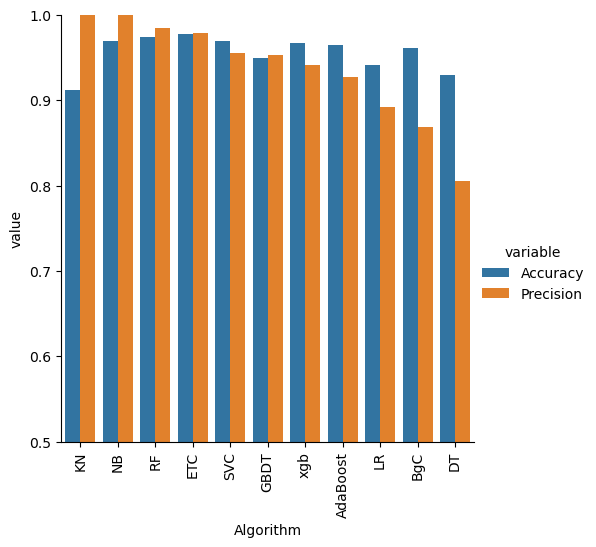

In [120]:
snb.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [121]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [122]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [123]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [124]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [125]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [126]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911628,1.000000,0.911628,1.000000,0.911628,1.000000,0.911628,1.000000
1,NB,0.968992,1.000000,0.968992,1.000000,0.968992,1.000000,0.968992,1.000000
2,RF,0.973643,0.984848,0.973643,0.984848,0.973643,0.984848,0.973643,0.984848
3,ETC,0.977519,0.978417,0.977519,0.978417,0.977519,0.978417,0.977519,0.978417
4,SVC,0.968992,0.955224,0.968992,0.955224,0.968992,0.955224,0.968992,0.955224
5,GBDT,0.949612,0.953271,0.949612,0.953271,0.949612,0.953271,0.949612,0.953271
6,xgb,0.967442,0.941176,0.967442,0.941176,0.967442,0.941176,0.967442,0.941176
7,AdaBoost,0.965116,0.927007,0.965116,0.927007,0.965116,0.927007,0.965116,0.927007
8,LR,0.941860,0.891892,0.941860,0.891892,0.941860,0.891892,0.941860,0.891892
9,BgC,0.961240,0.868421,0.961240,0.868421,0.961240,0.868421,0.961240,0.868421


In [127]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)



In [128]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [129]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9775193798449613
Precision 0.9925925925925926


In [130]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [131]:
from sklearn.ensemble import StackingClassifier

In [132]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [134]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9798449612403101
Precision 0.9594594594594594


In [9]:
# import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

In [2]:
import pickle

In [3]:
pickle

AttributeError: module 'pickle' has no attribute '__version__'

In [1]:
import pickle
pickle.dump(cv,open('./Statics/Datas/vectorizer.pkl','wb'))
pickle.dump(mnb,open('./Statics/Datas/model.pkl','wb'))

NameError: name 'cv' is not defined

In [1]:
# !pip install nltk

In [5]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [6]:
import pickle

In [14]:
model = pickle.load(open('./Statics/Datas/model.pkl','rb'))
tfidf = pickle.load(open('./Statics/Datas/vectorizer.pkl','rb'))

/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.24.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_6932/558105441.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  tfidf = pickle.load(open('./Statics/Datas/vectorizer.pkl','rb'))
/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

In [15]:
ps = PorterStemmer()

In [16]:


input_sms=input("message :")
    # 1. preprocess
transformed_sms = transform_text(input_sms)
    # 2. vectorize
vector_input = tfidf.transform([transformed_sms])
    # 3. predict
result = model.predict(vector_input)[0]
    # 4. Display
if result == 1:
    print("spam")
else:
    print("not a spam")

not a spam
